# 1. Import the necessary libraries and read the provided CSVs as a data frame and perform the below steps.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
import surprise 

In [3]:
# • Merge the provided CSVs into one data-frame.

data1 = pd.read_csv("/Users/Shiva/Desktop/python/Projects/project6_Recommendation/Dataset/phone_user_review_file_1.csv",encoding='ISO-8859-1',error_bad_lines=False, engine="python")
data2 = pd.read_csv("/Users/Shiva/Desktop/python/Projects/project6_Recommendation/Dataset/phone_user_review_file_2.csv",encoding='ISO-8859-1',error_bad_lines=False, engine="python")
data3 = pd.read_csv("/Users/Shiva/Desktop/python/Projects/project6_Recommendation/Dataset/phone_user_review_file_3.csv",encoding='ISO-8859-1',error_bad_lines=False, engine="python")
data4 = pd.read_csv("/Users/Shiva/Desktop/python/Projects/project6_Recommendation/Dataset/phone_user_review_file_4.csv",encoding='ISO-8859-1',error_bad_lines=False, engine="python")
data5 = pd.read_csv("/Users/Shiva/Desktop/python/Projects/project6_Recommendation/Dataset/phone_user_review_file_5.csv",encoding='ISO-8859-1',error_bad_lines=False, engine="python")
data6 = pd.read_csv("/Users/Shiva/Desktop/python/Projects/project6_Recommendation/Dataset/phone_user_review_file_6.csv",encoding='ISO-8859-1',error_bad_lines=False, engine="python")

In [4]:
data = pd.concat([data1, data2, data3, data4, data5,data6], ignore_index=True, sort=False)



#• Check a few observations and shape of the data-frame.

In [5]:
data.shape

## all the dataframes have 11 columns

(1415133, 11)

In [6]:
data.head()

## the phone_url column is going to be difficult to work with 
## domain names should be checked properly to include valid names and user comments.

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Verizon Wireless,verizonwireless.com,10.0,10.0,As a diehard Samsung fan who has had every Sam...,CarolAnn35,Samsung Galaxy S8
1,/cellphones/samsung-galaxy-s8/,4/28/2017,en,us,Phone Arena,phonearena.com,10.0,10.0,Love the phone. the phone is sleek and smooth ...,james0923,Samsung Galaxy S8
2,/cellphones/samsung-galaxy-s8/,5/4/2017,en,us,Amazon,amazon.com,6.0,10.0,Adequate feel. Nice heft. Processor's still sl...,R. Craig,"Samsung Galaxy S8 (64GB) G950U 5.8"" 4G LTE Unl..."
3,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Samsung,samsung.com,9.2,10.0,Never disappointed. One of the reasons I've be...,Buster2020,Samsung Galaxy S8 64GB (AT&T)
4,/cellphones/samsung-galaxy-s8/,5/11/2017,en,us,Verizon Wireless,verizonwireless.com,4.0,10.0,I've now found that i'm in a group of people t...,S Ate Mine,Samsung Galaxy S8


In [7]:
data.info()

## it has some null values.
## almost all are object datatypes except two columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1415133 entries, 0 to 1415132
Data columns (total 11 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   phone_url  1415133 non-null  object 
 1   date       1415133 non-null  object 
 2   lang       1415133 non-null  object 
 3   country    1415133 non-null  object 
 4   source     1415133 non-null  object 
 5   domain     1415133 non-null  object 
 6   score      1351644 non-null  float64
 7   score_max  1351644 non-null  float64
 8   extract    1395772 non-null  object 
 9   author     1351931 non-null  object 
 10  product    1415132 non-null  object 
dtypes: float64(2), object(9)
memory usage: 118.8+ MB


In [8]:
data.describe()

## only 2 columns are float and its giving mean details only for them...
## score_max is always 10...dont have how, maybe everyone have given to some phone 10 scores



,score,score_max
count,1.351644e+06,1351644.0
mean,8.007060e+00,10.0
std,2.616121e+00,0.0
min,2.000000e-01,10.0
25%,7.200000e+00,10.0
50%,9.200000e+00,10.0
75%,1.000000e+01,10.0
max,1.000000e+01,10.0


In [9]:
## • Round off scores to the nearest integers.
data = round(data[data['score'].notnull()]) 
data.head()

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Verizon Wireless,verizonwireless.com,10.0,10.0,As a diehard Samsung fan who has had every Sam...,CarolAnn35,Samsung Galaxy S8
1,/cellphones/samsung-galaxy-s8/,4/28/2017,en,us,Phone Arena,phonearena.com,10.0,10.0,Love the phone. the phone is sleek and smooth ...,james0923,Samsung Galaxy S8
2,/cellphones/samsung-galaxy-s8/,5/4/2017,en,us,Amazon,amazon.com,6.0,10.0,Adequate feel. Nice heft. Processor's still sl...,R. Craig,"Samsung Galaxy S8 (64GB) G950U 5.8"" 4G LTE Unl..."
3,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Samsung,samsung.com,9.0,10.0,Never disappointed. One of the reasons I've be...,Buster2020,Samsung Galaxy S8 64GB (AT&T)
4,/cellphones/samsung-galaxy-s8/,5/11/2017,en,us,Verizon Wireless,verizonwireless.com,4.0,10.0,I've now found that i'm in a group of people t...,S Ate Mine,Samsung Galaxy S8


In [10]:
#• Check for missing values. Impute the missing values if there is any.

data.isna().sum()

phone_url        0
date             0
lang             0
country          0
source           0
domain           0
score            0
score_max        0
extract      18945
author       60606
product          1
dtype: int64

In [11]:
# Since there wont be any outlier in score and max os score is 10, we are 
# going to fill the score and score_max columns with mean value 

data['score'] = data['score'].fillna(data['score'].mean())
data['score_max'] = data['score_max'].fillna(data['score'].mean())
data.isna().sum()

phone_url        0
date             0
lang             0
country          0
source           0
domain           0
score            0
score_max        0
extract      18945
author       60606
product          1
dtype: int64

In [12]:
## Extract we cant replace with anything, because its user's comments.  
## so we can remove the rows where author and extract are null 
data.dropna(axis=0, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1275917 entries, 0 to 1415132
Data columns (total 11 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   phone_url  1275917 non-null  object 
 1   date       1275917 non-null  object 
 2   lang       1275917 non-null  object 
 3   country    1275917 non-null  object 
 4   source     1275917 non-null  object 
 5   domain     1275917 non-null  object 
 6   score      1275917 non-null  float64
 7   score_max  1275917 non-null  float64
 8   extract    1275917 non-null  object 
 9   author     1275917 non-null  object 
 10  product    1275917 non-null  object 
dtypes: float64(2), object(9)
memory usage: 116.8+ MB


In [13]:
## checking 
data.isna().sum()

phone_url    0
date         0
lang         0
country      0
source       0
domain       0
score        0
score_max    0
extract      0
author       0
product      0
dtype: int64

In [14]:
# • Check for duplicate values and remove them if there is any.

data.duplicated()

0          False
1          False
2          False
3          False
4          False
           ...  
1415128    False
1415129    False
1415130    False
1415131    False
1415132    False
Length: 1275917, dtype: bool

In [15]:
# drop duplicates
data.drop_duplicates(subset=None, keep = 'first', inplace=True)
data.head()

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Verizon Wireless,verizonwireless.com,10.0,10.0,As a diehard Samsung fan who has had every Sam...,CarolAnn35,Samsung Galaxy S8
1,/cellphones/samsung-galaxy-s8/,4/28/2017,en,us,Phone Arena,phonearena.com,10.0,10.0,Love the phone. the phone is sleek and smooth ...,james0923,Samsung Galaxy S8
2,/cellphones/samsung-galaxy-s8/,5/4/2017,en,us,Amazon,amazon.com,6.0,10.0,Adequate feel. Nice heft. Processor's still sl...,R. Craig,"Samsung Galaxy S8 (64GB) G950U 5.8"" 4G LTE Unl..."
3,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Samsung,samsung.com,9.0,10.0,Never disappointed. One of the reasons I've be...,Buster2020,Samsung Galaxy S8 64GB (AT&T)
4,/cellphones/samsung-galaxy-s8/,5/11/2017,en,us,Verizon Wireless,verizonwireless.com,4.0,10.0,I've now found that i'm in a group of people t...,S Ate Mine,Samsung Galaxy S8


In [16]:
## checking
data.duplicated().sum()

0

In [17]:
## confirming all the duplicates and the null values are removed/replaced
data.shape

(1271437, 11)

In [18]:
## • Keep only 1000000 data samples. Use random state=612.

data_randomly_selected = data.sample(n=1000000, random_state=612)

data_randomly_selected.shape

(1000000, 11)

In [19]:
## • Drop irrelevant features. Keep features like Author, Product, and Score.

data_randomly_selected.drop(['phone_url', 'date', 'lang', 'country', 'source', 'domain'], axis=1, inplace=True)
data_randomly_selected.head()

,score,score_max,extract,author,product
510111,10.0,10.0,Good product in this price...,KHILESH KUMAR VERMA,"Lenovo Vibe K5 (Gold, VoLTE update)"
104794,8.0,10.0,"En general me gusta mucho mi nuevo S6, el reco...",Evyta,Samsung Galaxy S6
1222473,8.0,10.0,Ð½ÐµÑÐ¼Ð¾ÑÑÑ Ð½Ð° Ð½ÐµÐ´Ð¾ÑÑÐ°ÑÐºÐ¸ Ð² ...,VanRaZor,Sony Ericsson K810i
452910,6.0,10.0,ÐÑÑÑ ÑÐ¶Ðµ ÑÐ°Ð·Ð²ÐµÑÐ½ÑÑÑÐ¹ Ð¾ÑÐ·Ñ...,ruga,Sony Xperia Z2 (Black)
16933,10.0,10.0,Ein Wahnsinns Handy! Macht richtig schÃ¶ne Bil...,einer Kundin,"Samsung Galaxy S7 edge Smartphone, 13,9 cm (5,..."


##2. Answer the following questions

In [20]:
## • Identify the most rated features.

data_randomly_selected.score.unique()

array([10.,  8.,  6.,  2.,  4.,  7.,  9.,  1.,  5.,  3.,  0.])

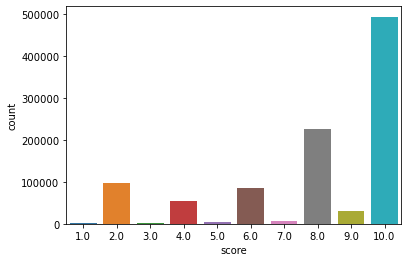

In [21]:
ratings_explicit = data_randomly_selected[data_randomly_selected.score != 0]
ratings_implicit = data_randomly_selected[data_randomly_selected.score == 0]

#plotting 
sns.countplot(data=ratings_explicit , x ='score')
plt.show()

## most of people have rated 10 

In [22]:
## • Identify the users with most number of reviews.


author_grouped = data_randomly_selected.groupby(['author']).agg({'score': 'count'}).reset_index()
author_grouped.sort_values(['score', 'author'], ascending = [0,1])

,author,score
23811,Amazon Customer,60408
76755,Cliente Amazon,15051
455055,e-bit,6651
76732,Client d'Amazon,6087
24173,Amazon Kunde,3683
...,...,...
626688,æ­¦è¡å¤§å¸«,1
626689,è¥ççç,1
626690,éªå°,1
626691,"éº¦ç¬ç¬,",1


In [23]:
## Select the data with products having more than 50 ratings and users who have given more than 50 ratings. Report the shape of the final
## dataset.


author_grouped = data_randomly_selected.groupby(['author']).agg({'score': 'count'}).reset_index()
product_grouped = data_randomly_selected.groupby(['product']).agg({'score': 'count'}).reset_index()


author50 = author_grouped[author_grouped['score'] > 50]
product50 = product_grouped[product_grouped['score'] > 50]



In [24]:
x_data = pd.concat([author50, product50], axis=1)
x_data.shape

(5089, 4)

In [25]:
## 3. Build a popularity based model and recommend top 5 mobile phones.


data_randomly_selected.groupby('product')['score'].count().sort_values(ascending=False).head()  



product
Lenovo Vibe K4 Note (White,16GB)     4109
Lenovo Vibe K4 Note (Black, 16GB)    3451
OnePlus 3 (Graphite, 64 GB)          3212
OnePlus 3 (Soft Gold, 64 GB)         2798
Huawei P8lite zwart / 16 GB          2121
Name: score, dtype: int64

In [26]:
data_randomly_selected.drop(['score_max'], axis=1, inplace=True)

In [27]:
## checking

data_randomly_selected.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 510111 to 13526
Data columns (total 4 columns):
 #   Column   Non-Null Count    Dtype  
---  ------   --------------    -----  
 0   score    1000000 non-null  float64
 1   extract  1000000 non-null  object 
 2   author   1000000 non-null  object 
 3   product  1000000 non-null  object 
dtypes: float64(1), object(3)
memory usage: 38.1+ MB


## Build a collaborative filtering model using SVD. You can use SVD from surprise or build it from scratch(Note: Incase you’re building it from scratch you
## can limit your data points to 5000 samples if you face memory issues). Build a collaborative filtering model using kNNWithMeans from surprise. You
## can try both user-based and item-based model.



In [28]:
from surprise import KNNWithMeans
from surprise import accuracy
from surprise.model_selection import train_test_split
from surprise import Reader
from surprise import Dataset

In [29]:
## Reducing the data size, because it crashes with the original size
data_randomly_selected = data.sample(n=5000, random_state=612)


In [30]:
### preparing dataset for the surprise, because surprise can read and rate a file while has 
## 3 columns, itemid, userid, and ratings 

reader = Reader(rating_scale = (0,10))

data_s = Dataset.load_from_df(data_randomly_selected[['author', 'product', 'score']], reader)

data_s

In [31]:
trainset, testset = train_test_split(data_s, test_size=.20)



KNNWithMeans

In [32]:
## Item based model

algo_itemBased = KNNWithMeans(k=50, sim_options={'name': 'pearson_baseline', 'user_based': False})

algo_itemBased.fit(trainset)


Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [33]:
train_pred_IB_Knn = algo_itemBased.test(trainset.build_testset())

test_pred_IB_Knn = algo_itemBased.test(testset)

In [34]:
# RMSE
print("Item-based With KNNWithMeans Model")
accuracy.rmse(train_pred_IB_Knn, verbose=True)
accuracy.rmse(test_pred_IB_Knn, verbose=True)

Item-based With KNNWithMeans Model
RMSE: 0.4052
RMSE: 2.6310


2.630993640854661

In [35]:
## user based model

algo_userBased = KNNWithMeans(k= 100, sim_options = {'name': 'pearson_baseline', 'user_based' : True})
algo_userBased.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [36]:
train_pred_UB_Knn = algo_userBased.test(trainset.build_testset())

test_pred_UB_Knn = algo_userBased.test(testset)

In [37]:
# RMSE
print("User-based With KNNWithMeans Model")
accuracy.rmse(train_pred_UB_Knn, verbose=True)
accuracy.rmse(test_pred_UB_Knn, verbose=True)

User-based With KNNWithMeans Model
RMSE: 0.3989
RMSE: 2.6100


2.6099995006825756

SVD model

In [38]:
## Building the SVD model

from surprise import SVD

svd_model = SVD(random_state=1)
svd_model.fit(trainset)

In [39]:
train_pred_svd_model = svd_model.test(trainset.build_testset())

test_pred_svd_model = svd_model.test(testset)

5. Evaluate the collaborative model. Print RMSE value.

In [40]:
print("SVD Model")
accuracy.rmse(train_pred_svd_model)

accuracy.rmse(test_pred_svd_model)


SVD Model
RMSE: 1.6445
RMSE: 2.5671


2.567079387469964

6. Predict score (average rating) for test users.




In [41]:
## SVD model test

svd_pred = svd_model.predict('ruga', 'Sony Xperia Z2 (Black)')

svd_pred.est


8.0225

In [42]:
## CF -- user based

userBased_pred = algo_userBased.predict('ruga', 'Sony Xperia Z2 (Black)')

userBased_pred.est


8.0225

In [43]:
## CF -- item based

itemBased_pred = algo_itemBased.predict('ruga', 'Sony Xperia Z2 (Black)')

itemBased_pred.est


8.0225

7. Report your findings and inferences.


In [44]:
## 1. RMSE is almost same in all the models, and its a bit lower side, so the accuracy of the model is pretty good.
## 2. RMSE of test > RMSE of train => OVER FITTING of the data.
## 3. The data set might need more fine tuning.   

## 4.  In the testing, item based, user based models predicted exactly 8 score



8. Try and recommend top 5 products for test users.



In [45]:
## Creating a new numerical columns for user and products to do the ranking

data_randomly_selected['author_id'] = pd.factorize(data_randomly_selected['author'])[0]
data_randomly_selected['product_id'] = pd.factorize(data_randomly_selected['author'])[0]

In [46]:
#Count of author_id for each unique product 

train_data_grouped = data_randomly_selected.groupby('product_id').agg({'author_id': 'count'}).reset_index()
train_data_grouped.rename(columns = {'author_id': 'score'},inplace=True)
train_data_grouped.head()

,product_id,score
0,0,1
1,1,1
2,2,1
3,3,1
4,4,15


In [47]:
#Sort the products on recommendation score 
train_data_sort = train_data_grouped.sort_values(['score', 'product_id'], ascending = [0,1]) 
      
#Generate a recommendation rank based upon score 
train_data_sort['Rank'] = train_data_sort['score'].rank(ascending=0, method='first') 
          
#Get the top 5 recommendations 
popularity_recommendations = train_data_sort.head(5) 
popularity_recommendations 

,product_id,score,Rank
19,19,287,1.0
8,8,77,2.0
221,221,37,3.0
393,393,22,4.0
4,4,15,5.0


In [48]:
def recommend(author_id):     
    user_recommendations = popularity_recommendations 
          
    #Add author_id column for which the recommendations are being generated 
    user_recommendations['authorID'] = author_id 
      
    #Bring author_id column to the front 
    cols = user_recommendations.columns.tolist() 
    cols = cols[-1:] + cols[:-1] 
    user_recommendations = user_recommendations[cols] 
          
    return user_recommendations 

In [49]:
find_recom = [1222473]   # This list is user choice.
for i in find_recom:
    print("Here is the recommendation for the userId: %d\n" %(i))
    print(recommend(i))    
    print("\n") 

Here is the recommendation for the userId: 1222473

     authorID  product_id  score  Rank
19    1222473          19    287   1.0
8     1222473           8     77   2.0
221   1222473         221     37   3.0
393   1222473         393     22   4.0
4     1222473           4     15   5.0




In [ ]:
find_recom = [1222473]   # This list is user choice.

9. Try cross validation techniques to get better results.

In [50]:
from surprise import KNNBaseline
from surprise import KNNBasic
from surprise.model_selection import cross_validate

benchmark = []
# Iterate over all algorithms
for algorithm in [SVD(), KNNBaseline(), KNNBasic(), KNNWithMeans()]:
    # Perform cross validation

    results = cross_validate(algorithm, data_s, measures=['RMSE'], cv=3, verbose=False)
    
    # Get results & append algorithm name
    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
    tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
    benchmark.append(tmp)
    
pd.DataFrame(benchmark).set_index('Algorithm').sort_values('test_rmse')    

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.


,test_rmse,fit_time,test_time
Algorithm,,,
SVD,2.576176,0.741089,0.022270
KNNBaseline,2.592107,0.648114,0.035505
KNNBasic,2.604263,0.528776,0.032291
KNNWithMeans,2.617246,1.300878,0.144577


10. In what business scenario you should use popularity based Recommendation Systems ?

In [51]:
## If the user/product is very new and we know nothing about the product or the user, then we would be using the popularity based recommended systems

11. In what business scenario you should use CF based Recommendation Systems ?

In [52]:
##If we need to recommend users some items, or if we would like the items to be sold to the users, then we would be using this 
## like amazon, netflix, uses this recommendation system 

12. What other possible methods can you think of which can further improve the recommendation for different users ?

In [53]:
## we could use hybrid approach, like having both CF based and popularity based recommendation
## we could use content based, if they are new user, or if the product is new one, we could use this one.